In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

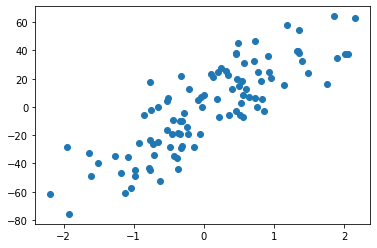

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [3]:
# apply actual linear regression from sklearn to fetch actual results
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [ ]:
m = 28.12

In [4]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

## for single variable

In [21]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 28.12
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope)
            print(loss_slope, self.b)
        print(self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    


In [23]:
gd = GDRegressor(0.01,10)
gd.fit(X, y)
# it is stuck in the same loop here
# sol - increase epoch, decrease lr

-23537.64116001603 115.37641160016031
23537.64116001603 -120.0
-23537.64116001603 115.37641160016031
23537.64116001603 -120.0
-23537.64116001603 115.37641160016031
23537.64116001603 -120.0
-23537.64116001603 115.37641160016031
23537.64116001603 -120.0
-23537.64116001603 115.37641160016031
23537.64116001603 -120.0
-120.0


In [22]:
gd = GDRegressor(0.001,100)
gd.fit(X, y)

-23537.64116001603 -96.46235883998396
-18830.11292801282 -77.63224591197114
-15064.090342410256 -62.568155569560886
-12051.272273928204 -50.51688329563268
-9641.017819142568 -40.87586547649011
-7712.814255314051 -33.16305122117606
-6170.251404251242 -26.99279981692482
-4936.201123400993 -22.056598693523824
-3948.9608987207935 -18.107637794803033
-3159.168718976635 -14.948469075826399
-2527.3349751813084 -12.42113410064509
-2021.8679801450467 -10.399266120500045
-1617.4943841160375 -8.781771736384007
-1293.99550729283 -7.4877762290911765
-1035.1964058342637 -6.4525798232569125
-828.157124667411 -5.624422698589502
-662.5256997339287 -4.961896998855573
-530.0205597871429 -4.4318764390684295
-424.01644782971437 -4.007859991238715
-339.2131582637714 -3.6686468329749435
-271.37052661101717 -3.3972763063639264
-217.09642128881381 -3.1801798850751126
-173.677137031051 -3.0065027480440616
-138.94170962484083 -2.867561038419221
-111.15336769987276 -2.7564076707193483
-88.92269415989811 -2.667484

## for 2 variables

In [5]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    


In [6]:
gd = GDRegressor(0.001,50)  # can do this in 50 epochs instead of 100
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [25]:
gd.predict(X)

array([[-140.03242542],
       [-132.29253584],
       [-132.75951696],
       [ -93.20640322],
       [-113.31143759],
       [ -95.78273616],
       [-126.8423342 ],
       [-114.79931987],
       [-140.27451082],
       [-132.08870594],
       [ -63.3319904 ],
       [-108.8295739 ],
       [-114.1566625 ],
       [-126.53581552],
       [-141.61379182],
       [-107.2571798 ],
       [-102.00646267],
       [-109.88995185],
       [-165.41683593],
       [ -70.81132086],
       [-142.18637138],
       [-134.39645845],
       [-146.10478655],
       [ -59.53123096],
       [-125.83067352],
       [-166.09130672],
       [-129.52194531],
       [-129.05811723],
       [-133.53616421],
       [-134.71137772],
       [ -99.69834259],
       [ -98.4625813 ],
       [-107.24811315],
       [-155.47635918],
       [-181.50168148],
       [-153.33397691],
       [-113.88525934],
       [ -82.59148811],
       [-150.57154633],
       [-104.18920083],
       [-162.54120464],
       [-120.067

In [7]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579